# Alterenative imputation methods

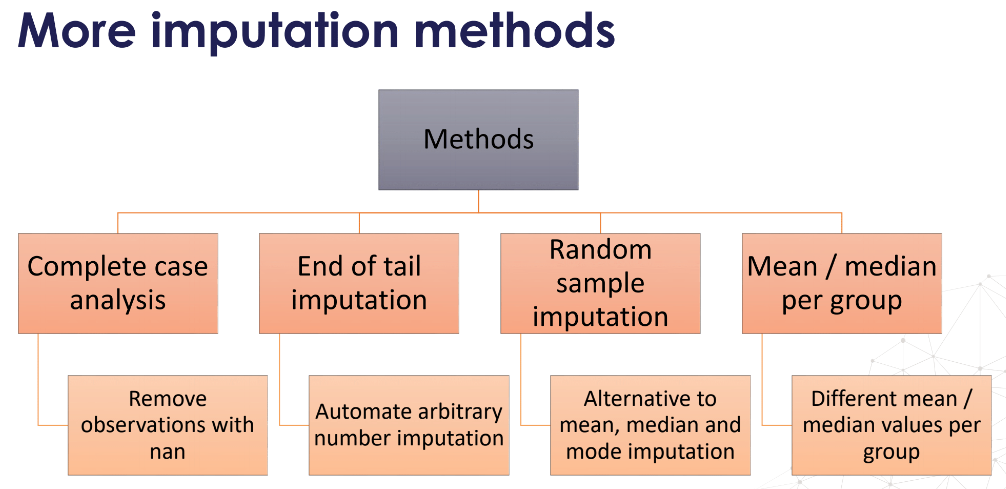

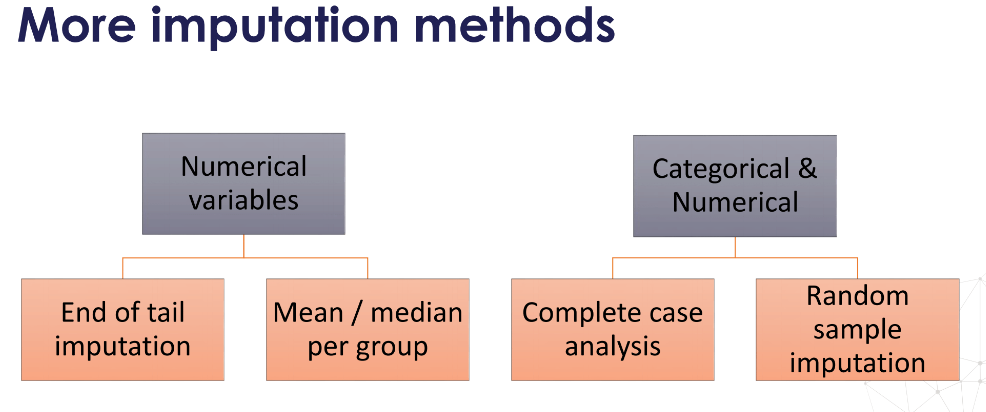

# Complete case analysis

Remove all na observations

* Assumes that the data is completely missing at random
* Preserves distribution of the variable
* Could lead to biased dataset

**Link for further reference**
* [Complete case analysis](https://www.dropbox.com/scl/fo/le47x1fez8y7g7akw9bo9/AE3ZD4Ej5leLmvwItGtHnEg/Section-06-Imputation-Alternative?dl=0&e=1&preview=02-Complete-case-analysis.pdf&rlkey=7257ih8lct4v0nkroy7if74i1&subfolder_nav_tracking=1)


## CCA with Pandas

In [ ]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

### Drop when NA in any variable

In [ ]:
X_train_t = X_train.dropna()
X_test_t = X_test.dropna()

X_train_t.shape, X_test_t.shape

### Drop when NA in certain variables

In [ ]:
X_train_t = X_train.dropna(subset=["MasVnrArea", "BsmtQual"])
X_test_t = X_test.dropna(subset=["MasVnrArea", "BsmtQual"])

X_train_t.shape, X_test_t.shape

### Drop when NA in all variables


In [ ]:
X_train_t = X_train.dropna(how="all")
X_test_t = X_test.dropna(how="all")

X_train_t.shape, X_test_t.shape

### Require that many non-NA values based on threshold


In [ ]:
X_train_t = X_train.dropna(thresh=0.5)
X_test_t = X_test.dropna(thresh=0.5)

X_train_t.shape, X_test_t.shape

## CCA with Feature engine

### Drop data based on specific variables.

* missing_only=True: Focuses on specified columns for missing values.
* missing_only=False: Considers missing values in all columns for dropping rows.

In [ ]:
from feature_engine.imputation import DropMissingData

# Step 1: Initialize the DropMissingData imputer
# This imputer will remove rows with missing values from the specified columns
imputer = DropMissingData(
    variables=["Alley", "MasVnrType", "LotFrontage", "MasVnrArea"],  # Columns to check for missing values
    missing_only=False,  # Drop rows if NA in any of the specified columns
)

# Step 2: Fit the imputer on the training data
# The imputer learns which rows have missing values in the specified columns
imputer.fit(X_train)

# Step 3: Display the columns for which rows will be removed
# This shows the list of columns that were specified for missing value removal
imputer.variables_

# Step 4: Count the number of missing values in the specified columns before transformation
# This provides a count of NA values in the columns of interest before any rows are dropped
X_train[imputer.variables_].isna().sum()

# Step 5: Apply the imputer to remove rows with missing values in the specified columns
# This creates new DataFrames with rows containing NA values removed
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# Step 6: Count the number of missing values in the specified columns after transformation
# This shows that there are no more NA values in these columns after rows with missing values have been dropped
train_t[imputer.variables_].isna().sum()

In [ ]:
# The "return_na_data()" method, returns a dataframe that contains
# the observations with NA.

# That is, the portion of the data that is dropped when
# we apply the transform() method.

tmp = imputer.return_na_data(X_train)

tmp.shape

### Drop data when variables contain % of NA

In [ ]:
# Step 1: Initialize DropMissingData to drop rows with NA in at least 50% of the specified variables
# The imputer will remove rows if NA is present in 2 or more out of the 4 specified columns
imputer = DropMissingData(
    variables=["Alley", "MasVnrType", "LotFrontage", "MasVnrArea"],
    missing_only=False,  # Evaluate all specified variables, not just those with NA in training data
    threshold=0.5,  # Drop rows with NA in 50% or more of the specified variables
)

# Step 2: Fit the imputer on the training data
# This learns which rows contain NA in the specified variables and meet the drop condition
imputer.fit(X_train)

# Step 3: Apply the transformation to both training and test datasets
# Rows with NA in at least 50% of the specified variables are removed
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# Step 4: Check the number of missing values in the specified variables after transformation
# This confirms that rows with excessive missing values have been dropped
train_t[imputer.variables].isna().sum()

### Automatically select all variables

We can drop obserations if they show NA in any variable in the dataset.

* When the parameter variables is left to None and the parameter missing_only is left to True, the imputer will evaluate observations based of all variables with missing data.
* When the parameter variables is left to None and the parameter missing_only is switched to False, the imputer will evaluate observations based of all variables.
* It is good practice to use missing_only=True when we set variables=None, so that the transformer handles the imputation automatically in a meaningful way.

In [ ]:
from feature_engine.imputation import DropMissingData

# Step 1: Initialize the DropMissingData imputer
# This imputer will identify columns with missing values and remove rows with NA in those columns
imputer = DropMissingData(missing_only=True)

# Step 2: Fit the imputer on the training data
# The imputer learns which columns contain missing values in the training set
imputer.fit(X_train)

# Step 3: Display the columns with missing values
# This shows the list of columns that have missing values in the training data
imputer.variables_

# Step 4: Count the number of missing values in these columns before transformation
# This provides a count of NA values in the columns with missing data
X_train[imputer.variables_].isna().sum()

# Step 5: Apply the imputer to remove rows with missing values in identified columns
# This creates new DataFrames with rows containing NA values removed
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# Step 6: Count the number of missing values in these columns after transformation
# This shows that there are no more NA values in these columns after rows with missing values have been removed
train_t[imputer.variables_].isna().sum()

### Drop rows with % of missing data

In [ ]:
from feature_engine.imputation import DropMissingData

# Step 1: Initialize the DropMissingData imputer
# This imputer will remove rows with missing values from columns where NA is above the specified threshold
# 'missing_only=True' means only columns with missing values will be considered
# 'threshold=0.75' specifies that rows will be dropped if 75% or more of the values in a column are missing
imputer = DropMissingData(
    missing_only=True,
    threshold=0.75,
)

# Step 2: Fit the imputer on the training data
# The imputer identifies columns with missing values and learns which rows to remove based on the threshold
imputer.fit(X_train)

# Step 3: Apply the imputer to remove rows with missing values in identified columns
# This creates new DataFrames with rows containing NA values removed
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# End of distribution imputation

End of tail imputation is equivalent to arbitrary value imputation,
but automatically selecting arbitrary values at the end of the
variable distributions

* If the variable is normally distributed, we can use the mean plus
or minus 3 times the standard deviation
* If the variable is skewed, we can use the IQR proximity rule
* Suitable numerical variables
* Distribution, std and covariance is highly affected

**Link for further reference**
* [End of distribution imputation](https://www.dropbox.com/scl/fo/le47x1fez8y7g7akw9bo9/AE3ZD4Ej5leLmvwItGtHnEg/Section-06-Imputation-Alternative?dl=0&e=1&preview=03-end-tail-imputation.pdf&rlkey=7257ih8lct4v0nkroy7if74i1&subfolder_nav_tracking=1)

## End of distribution with pandas

### Mean and std

In [ ]:
# Step 1: Identify variables with missing values
# Create a list of column names (variables) that have missing values in the training dataset
vars_na = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

# Display the variables with missing values
vars_na

# Step 2: Calculate imputation values for each variable
# Create a dictionary where keys are variable names and values are the imputation values
# Imputation value is calculated as the mean plus three times the standard deviation for each variable
imputation_dict = (X_train[vars_na].mean() + 3 * X_train[vars_na].std()).to_dict()

# Display the dictionary with imputation values
imputation_dict

# Step 3: Replace missing values with calculated imputation values
# Use the imputation dictionary to fill in missing values in both the training and test datasets
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

# Step 4: Verify that all missing values have been filled
# Check for remaining missing values in the training and test datasets
X_train.isnull().sum()
X_test.isnull().sum()

### IQR

In [ ]:
# Step 1: Calculate the Interquartile Range (IQR) for each variable with missing values
# The IQR is the range between the 75th percentile (Q3) and the 25th percentile (Q1)
IQR = X_train[vars_na].quantile(0.75) - X_train[vars_na].quantile(0.25)

# Step 2: Calculate the imputation values based on the IQR
# Imputation value is set to the 75th percentile (Q3) plus three times the IQR for each variable
imputation_dict = (X_train[vars_na].quantile(0.75) + 3 * IQR).to_dict()

# Display the dictionary with imputation values
imputation_dict

# Step 3: Replace missing values with calculated imputation values
# Use the imputation dictionary to fill in missing values in both the training and test datasets
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

### Max value

In [ ]:
# Step 1: Calculate the imputation values based on the maximum value for each variable
# The imputation value is set to three times the maximum value observed in the training set for each variable with missing data
imputation_dict = (X_train[vars_na].max() * 3).to_dict()

# Display the dictionary with the calculated imputation values
imputation_dict

# Step 2: Replace missing values with the calculated imputation values
# Use the imputation dictionary to fill in missing values in both the training and test datasets
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

## End of distribution with Feature engine

In [ ]:
from feature_engine.imputation import EndTailImputer

# Step 1: Initialize the EndTailImputer
# We choose 'gaussian' for the imputation method to use a Gaussian approximation
# 'tail="right"' specifies that values are placed at the right tail of the distribution
imputer = EndTailImputer(imputation_method="gaussian", tail="right")

# Step 2: Fit the imputer on the training data
# The imputer learns which numerical variables to apply the imputation to
imputer.fit(X_train)

# Step 3: Check the variables identified by the imputer
# These are the numerical variables for which NA values will be replaced
imputer.variables_

# Step 4: View the imputation values for each variable
# These are the values to be used for replacing NA in each numerical variable
imputer.imputer_dict_

# Step 5: Transform the training and test datasets
# The imputer replaces NA values with the specified values and returns DataFrames
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Display the first few rows of the transformed training data
# This allows us to inspect the results of the imputation
X_train_t.head()

# Step 7: Check that there are no more NA values in the imputed numerical variables
# This confirms that NA values have been successfully replaced
X_train_t[imputer.variables_].isnull().mean()

### Impute specific variables

In [ ]:
# Step 1: Initialize the EndTailImputer
# We use 'iqr' for the imputation method to apply the inter-quartile range rule
# 'tail="left"' specifies that values are placed at the left tail of the distribution
# We select only specific variables for imputation
imputer = EndTailImputer(
    imputation_method="iqr", tail="left", variables=["LotFrontage", "MasVnrArea"]
)

# Step 2: Fit the imputer on the training data
# The imputer learns which numerical variables to apply the imputation to
imputer.fit(X_train)

# Step 3: Check the variables identified by the imputer
# These are the numerical variables for which NA values will be replaced
imputer.variables_

# Step 4: View the imputation values for each variable
# These are the values assigned to replace NA in each specified variable
imputer.imputer_dict_

# Step 5: Transform the training and test datasets
# The imputer replaces NA values with the specified values and returns DataFrames
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Check that there are no more NA values in the imputed numerical variables
# This confirms that NA values have been successfully replaced
X_train_t[imputer.variables_].isnull().mean()

### Pipeline

In [ ]:
# Step 1: Initialize the Pipeline
# The pipeline includes two imputation steps:
# - 'imputer_skewed': Uses IQR proximity rule to impute skewed variables
# - 'imputer_gaussian': Uses Gaussian approximation to impute a variable
pipe = Pipeline(
    [
        (
            "imputer_skewed",
            EndTailImputer(
                imputation_method="iqr",  # Apply IQR rule
                tail="right",  # Place values at the right tail
                variables=["GarageYrBlt", "MasVnrArea"],  # Variables to impute
            ),
        ),
        (
            "imputer_gaussian",
            EndTailImputer(
                imputation_method="gaussian",  # Apply Gaussian approximation
                tail="right",  # Place values at the right tail
                variables=["LotFrontage"],  # Variable to impute
            ),
        ),
    ]
)

# Step 2: Fit the pipeline on the training data
# The pipeline learns the imputation parameters for each step
pipe.fit(X_train)

# Step 3: View the imputation values for the skewed variables
# These are the values used to replace NA in the specified skewed variables
pipe.named_steps["imputer_skewed"].imputer_dict_

# Step 4: View the imputation values for the Gaussian imputation
# This is the value used to replace NA in the specified Gaussian variable
pipe.named_steps["imputer_gaussian"].imputer_dict_

# Step 5: Transform the training and test datasets
# The pipeline replaces NA values according to the imputation methods specified
X_train_t = pipe.transform(X_train)
X_test_t = pipe.transform(X_test)

# Step 6: Check that there are no more NA values in the test set
# This confirms that NA values have been successfully replaced
X_test_t.isnull().mean()

# Random sample imputation

Random sampling consist in taking a random observation from the pool of available observations of the variable, and using that randomly extracted value to fill the NA

* **Assumptions:**
* Data is missing at random.
* The missing values are replaced with a sample of values from the same distribution as the original variable.
* Suitable for both numerical and categorical variables
* Preserves the variance of the variable
* Can be integrated in production (during model deployment)


**Link for further reference**
* [Random sample imputation](https://www.dropbox.com/scl/fo/le47x1fez8y7g7akw9bo9/AE3ZD4Ej5leLmvwItGtHnEg/Section-06-Imputation-Alternative?dl=0&e=1&preview=04-Random-sample-imputation.pdf&rlkey=7257ih8lct4v0nkroy7if74i1&subfolder_nav_tracking=1)

## Random sample with pandas

In [ ]:
for var in vars_na:

    # extract the random sample to fill the na:
    # remember we do this always from the train set, and we use
    # these to fill both train and test

    random_sample_train = (
        X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=0)
    )

    random_sample_test = (
        X_train[var].dropna().sample(X_test[var].isnull().sum(), random_state=0)
    )

    # what is all of the above code doing?

    # 1) dropna() removes the NA from the original variable, this
    # means that I will randomly extract existing values and not NAs

    # 2) sample() is the method that will do the random sampling

    # 3) X_train[var].isnull().sum() is the number of random values to extract
    # I want to extract as many values as NAs are present in the original variable

    # 4) random_state sets the seed for reproducibility, so that I extract
    # always the same random values, every time I run this notebook

    # pandas needs to have the same index in order to merge datasets
    random_sample_train.index = X_train[X_train[var].isnull()].index
    random_sample_test.index = X_test[X_test[var].isnull()].index

    # replace the NA in the newly created variable
    X_train.loc[X_train[var].isnull(), var] = random_sample_train
    X_test.loc[X_test[var].isnull(), var] = random_sample_test

X_train.isnull().sum()

## Random sample with feature engine

In [ ]:
from feature_engine.imputation import RandomSampleImputer

# Step 1: Initialize the RandomSampleImputer
# This imputer will replace missing values by sampling from existing non-NA values.
imputer = RandomSampleImputer(random_state=29)

# Step 2: Fit the imputer on the training data
# This process prepares the imputer by storing non-NA values for sampling.
imputer.fit(X_train)

# Step 3: Display the variables selected by the imputer
# This shows which variables were used for sampling; by default, all variables with missing values.
imputer.variables_

# Step 4: View the stored non-NA values used for sampling
# This shows a snapshot of the non-NA values from the training set used for imputation.
imputer.X_.head()

# Step 5: Transform the training and test datasets
# This replaces missing values with randomly sampled values from the non-NA data.
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Display the first few rows of the transformed training data
# This shows the dataset after missing values have been imputed.
X_train_t.head()

# Step 7: Check for any remaining NA values in the transformed data
# This verifies that no missing values are left in the specified variables.
X_train_t[imputer.variables_].isnull().mean()

# Mean/Median imputation

* Replacement value = variable mean or median
* Suitable numerical variables
* Grouping variable should be categorical or discrete.

**Why use this method?**
* We’d like a better representation of the missing data.
* The variable distribution differs based on the grouping
variable.

**Link for further reference**
* [Mean/Median imputation](https://www.dropbox.com/scl/fo/le47x1fez8y7g7akw9bo9/AE3ZD4Ej5leLmvwItGtHnEg/Section-06-Imputation-Alternative?dl=0&e=1&preview=05-Mean-median-per-group.pdf&rlkey=7257ih8lct4v0nkroy7if74i1&subfolder_nav_tracking=1)

## Mean/Median with pandas

In [ ]:
# Step 1: Capture the variables with missing values
# Create a list of variables in X_train that have missing values
vars_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

# Step 2: Examine mean values of variables grouped by a categorical feature
# Check how the mean values of 'LotFrontage', 'MasVnrArea', and 'GarageYrBlt' vary by 'LotShape'
X_train.groupby("LotShape")[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].mean()

# Step 3: Count observations per category in 'LotShape'
# Determine how many observations exist for each category in 'LotShape'
X_train["LotShape"].value_counts()

# Step 4: Create a dictionary of mean values for each category in 'LotShape'
# Calculate the mean of each variable for each 'LotShape' category and store in a dictionary
imputation_dict = {}
for i in X_train["LotShape"].unique():
    imputation_dict[i] = (
        X_train[X_train["LotShape"] == i][vars_to_impute].mean().to_dict()
    )

# Step 5: Replace missing values in both train and test sets
# Use the mean values calculated for each 'LotShape' category to fill missing values
for i in imputation_dict.keys():
    X_train[X_train["LotShape"] == i] = X_train[X_train["LotShape"] == i].fillna(
        imputation_dict[i]
    )
    X_test[X_test["LotShape"] == i] = X_test[X_test["LotShape"] == i].fillna(
        imputation_dict[i]
    )

# Step 6: Verify that there are no more missing values
# Check the number of missing values in X_test to ensure all have been filled
X_test.isnull().sum()